# A thalamo-cortical model of post-sleep memory improvement

*Bruna, Catalina and Flávio.*

LASCON 2024

In this Jupyter Notebook, we are going to model a thalamo-cortical model of post-sleep memory improvement. This project reproducts the paper ["Sleep-like slow oscillations improve visual classification through synaptic homeostasis and memory association in a thalamo-cortical model"](https://www.nature.com/articles/s41598-019-45525-0), whose code is not publicly available. The project is also part of the activities developed during LASCON 2024. 

In this notebook, we will go step by step in the simulation of the phases:

1. Training phase
2. Pre-sleep retrieval phase
3. Sleep phase
4. Post-sleep retrieval phase

You can find model creatin details in network.py file.

Let's start. :)

-------------------------------

Importing libraries

In [1]:
import nest
import random

import matplotlib.pyplot as plt
import seaborn as sns

from model.network import Network


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Jul 22 2023 00:00:00

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## 1. Training phase

*"Every time a new training image is presented to the network through the thalamic pathway, the facilitation signal coming from the contextual signal provides a 2 kHz Poisson spike train to a different set of 20 neurons, inducing the group to encode for that specific input stimulus (see the Discussion section for details about this choice). Additionally a 10 kHz Poisson spike train is provided to inhibitory neurons (in) to prevent already trained neurons to respond to new stimuli in the training phase."* (Capone, C., Pastorelli, E., Golosio, B. et al. 2019)

First, let's instantiate the network and connect it to the multimeters and spike recorders.

In [2]:
# Instantiate network
net = Network(n_train_images=9)

In [3]:
# Connect to multimeters and spike records
net.connect_all_devices()

Since we are not working with the MNIST dataset now, let's create artificial data. Later, we'll replace this part with the real data. 

In [4]:
# Generate random feature vectors to input to the tc population
vector_length = 324
non_zero_elements = 81
binary_vectors = [0] * (net.cx_n//net.SET_CX_NEURON)

for i in range(net.cx_n//net.SET_CX_NEURON):
    binary_vectors[i] = [0] * vector_length
    positions_to_set = random.sample(range(vector_length), non_zero_elements)
    for position in positions_to_set:
        binary_vectors[i][position] = 1   

print("Binary Vector:", binary_vectors)

Binary Vector: [[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], [0, 0, 1, 

Run simulation.

In [5]:
# Simulate for all populations
# The inhibitory signal in commented, even though it should be present, to reproduce the first figure of the paper. 

for i in range(0, net.n_train_images):
    if i == 0:
        net.input_train_signal(time_id=i, feature_vector=binary_vectors[i])
        net.input_context_signal(neuron_group=i)
        print(f"Run {i}.")
        nest.Simulate(900.0)
    else:
        net.input_train_signal(time_id=i, feature_vector=binary_vectors[i])
        net.input_context_signal(neuron_group=i)
        #net.input_inhib_signal(time_id=i)
        print(f"Run {i}.")
        nest.Simulate(900.0)

Training signal successfully created.
Connecting input to the tc population...
... training signal successfully connected to the tc population.
Contextual signal successfully created.
Connecting input to the cx population...
... contextual signal successfully connected to the cx population.
Run 0.

Jan 30 16:38:23 NodeManager::prepare_nodes [Info]: 
    Preparing 914 nodes for simulation.

Jan 30 16:38:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 914
    Simulation time (ms): 900
    Number of OpenMP threads: 1
    Not using MPI

Jan 30 16:38:39 SimulationManager::run [Info]: 
    Simulation finished.
Training signal successfully created.
Connecting input to the tc population...
... training signal successfully connected to the tc population.
Contextual signal successfully created.
Connecting input to the cx population...
... contextual signal successfully connected to the cx population.
Run 1.

Jan 30 16:38:39 NodeManager::prepare_nodes [Info]: 
    Prepar

Plot results.

Cx population:

Jan 30 16:40:32 NodeManager::prepare_nodes [Info]: 
    Preparing 930 nodes for simulation.

Jan 30 16:40:32 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 930
    Simulation time (ms): 900
    Number of OpenMP threads: 1
    Not using MPI

Jan 30 16:40:48 SimulationManager::run [Info]: 
    Simulation finished.


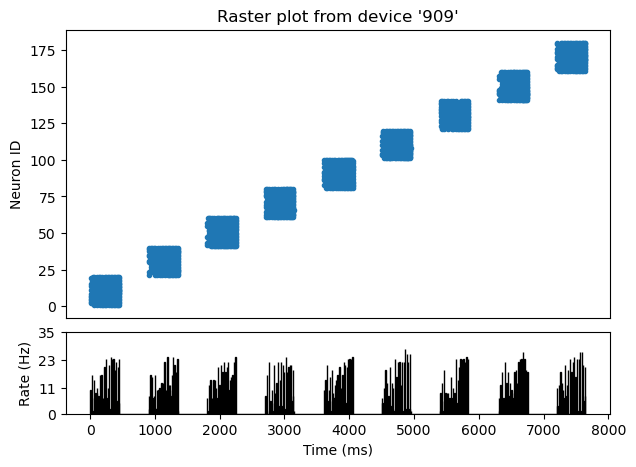

In [6]:
nest.raster_plot.from_device(net.spikes_cx, hist=True)

Tc population:

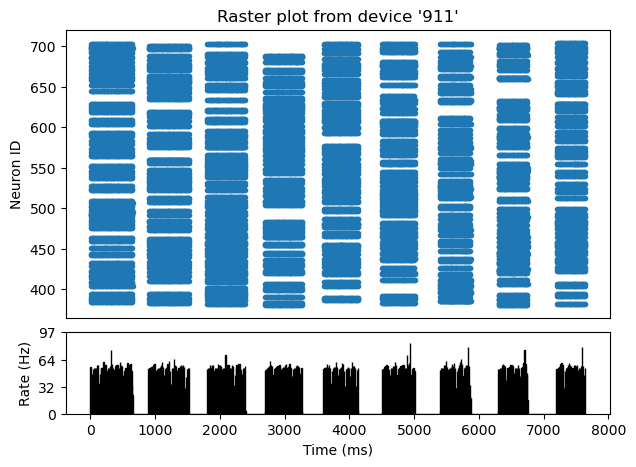

In [7]:
nest.raster_plot.from_device(net.spikes_tc, hist=True)

In population:

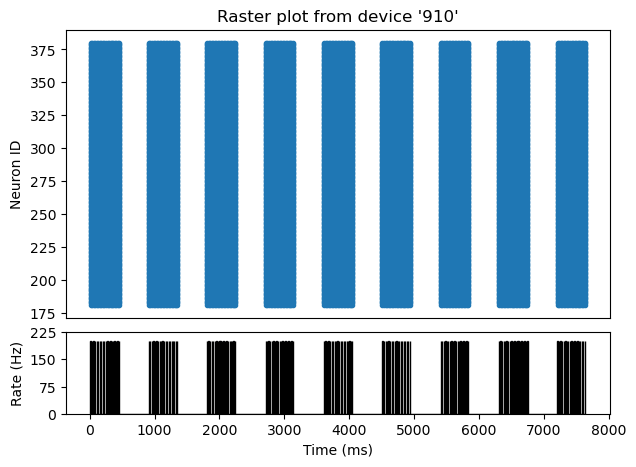

In [8]:
nest.raster_plot.from_device(net.spikes_in, hist=True)

Re population:

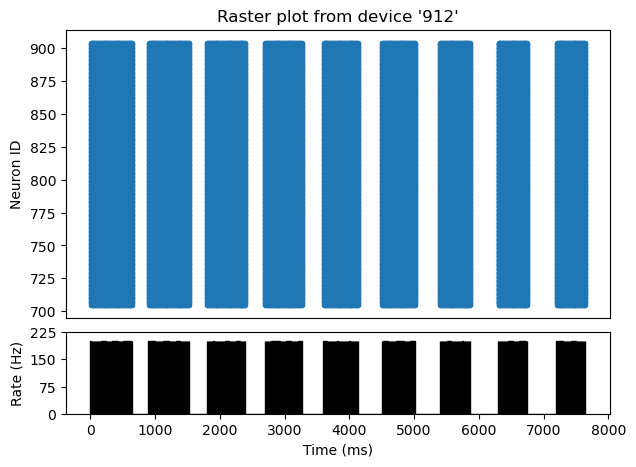

In [9]:
nest.raster_plot.from_device(net.spikes_re, hist=True)

## 2. Pre-sleep retrieval phase

*"During the retrieval phase only the 30 kHz input to thalamic cell is provided, while the contextual signal is off."* (Capone, C., Pastorelli, E., Golosio, B. et al. 2019)

Run simulation.

In [10]:
# Simulate for all populations
i_retrieve = net.n_train_images + 1

for i in range(0 + i_retrieve, i_retrieve + net.n_train_images):
    net.input_train_signal(time_id=i, feature_vector=binary_vectors[10-i])
    print(f"Run {i}.")
    nest.Simulate(900.0)

Training signal successfully created.
Connecting input to the tc population...
... training signal successfully connected to the tc population.
Run 10.
Training signal successfully created.
Connecting input to the tc population...

Jan 30 16:41:13 NodeManager::prepare_nodes [Info]: 
    Preparing 931 nodes for simulation.

Jan 30 16:41:13 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 931
    Simulation time (ms): 900
    Number of OpenMP threads: 1
    Not using MPI

Jan 30 16:41:28 SimulationManager::run [Info]: 
    Simulation finished.
... training signal successfully connected to the tc population.
Run 11.

Jan 30 16:41:28 NodeManager::prepare_nodes [Info]: 
    Preparing 932 nodes for simulation.

Jan 30 16:41:28 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 932
    Simulation time (ms): 900
    Number of OpenMP threads: 1
    Not using MPI

Jan 30 16:41:46 SimulationManager::run [Info]: 
    Simulation finished.
Training signal su

Plot results.

Cx population:

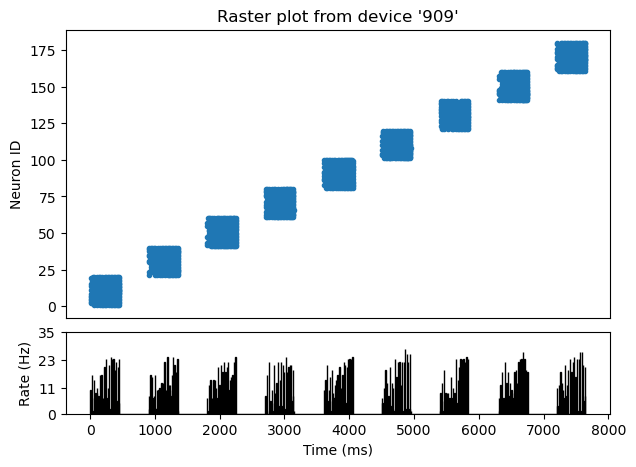

In [11]:
nest.raster_plot.from_device(net.spikes_cx, hist=True)

Tc population:

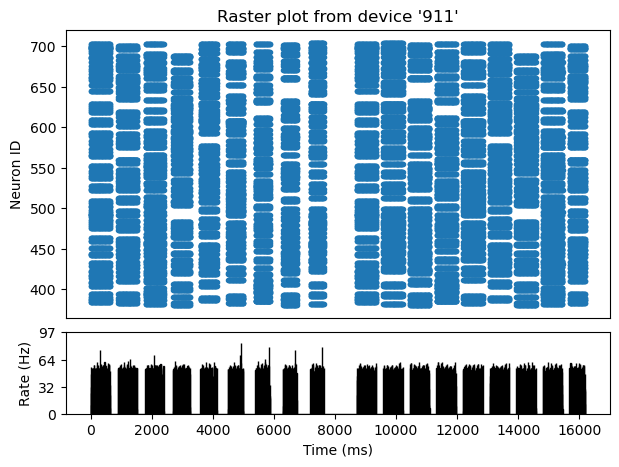

In [12]:
nest.raster_plot.from_device(net.spikes_tc, hist=True)

In population:

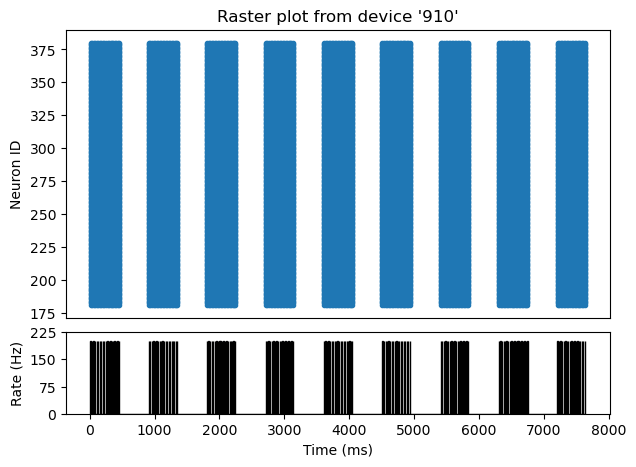

In [13]:
nest.raster_plot.from_device(net.spikes_in, hist=True)

Re population:

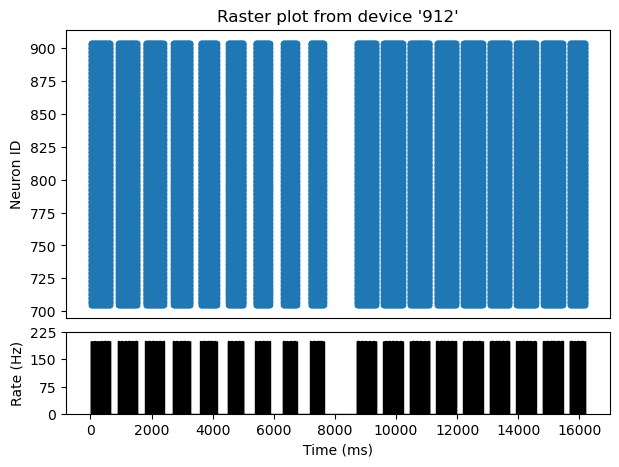

In [14]:
nest.raster_plot.from_device(net.spikes_re, hist=True)

## 3. Sleep phase

*"After the training stage, the sleep-like thalamo-cortical spontaneous slow oscillations activity is induced for a total duration of 600s by providing a non-specific Poisson noise inside the cortex (700 Hz) and increasing the strength of SFA parameter (b = 60, in eq. (1)). No external stimulus is provided to cells. Also, the synaptic weights between inhibitory and excitatory neurons in the cortex is reduced to -0.5. In this stage asymmetric STDP plasticity (alpha = 3.0) is active in the recurrent cx connectivity, inducing sleep-induced modification in the synaptic weights structure. The parameters’ change to obtain the slow oscillating regime were chosen relying on mean field theory framework18,19."* (Capone, C., Pastorelli, E., Golosio, B. et al. 2019)

Simulate sleep.

In [15]:
# Input sleep oscillation
net.input_sleep()

Generating sleep oscillations...
...done.


Connecting input to the cortex populations...
... sleep oscillation signal successfully inputed to the cx and in populations (i.e., whole cortex).

Jan 30 16:44:05 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.


In [25]:
# Run simulation
nest.Simulate(5000.0)


Jan 30 16:48:00 NodeManager::prepare_nodes [Info]: 
    Preparing 940 nodes for simulation.

Jan 30 16:48:00 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 940
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Not using MPI

Jan 30 16:49:16 SimulationManager::run [Info]: 
    Simulation finished.


Get results.

Cx population:

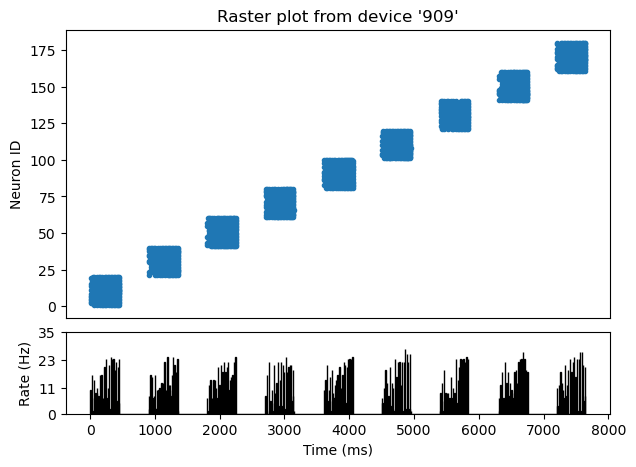

In [26]:
nest.raster_plot.from_device(net.spikes_cx, hist=True)

Tc population:

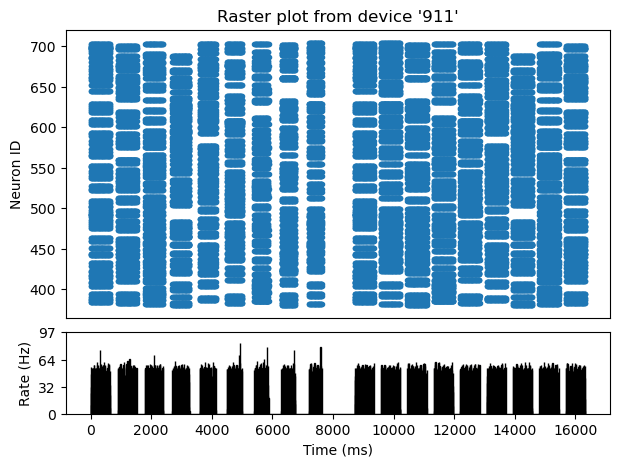

In [27]:
nest.raster_plot.from_device(net.spikes_tc, hist=True)

In population:

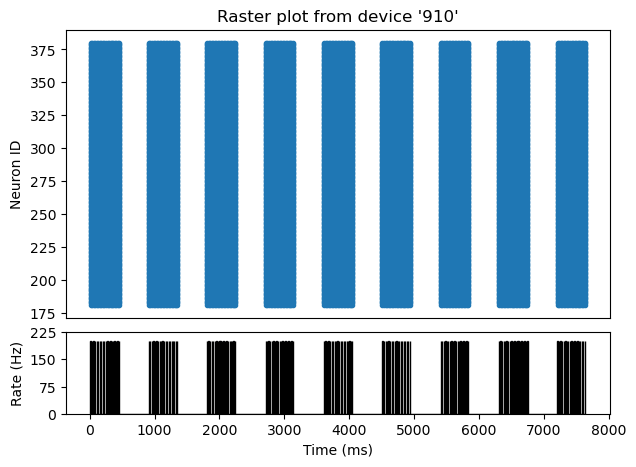

In [28]:
nest.raster_plot.from_device(net.spikes_in, hist=True)

Re population:

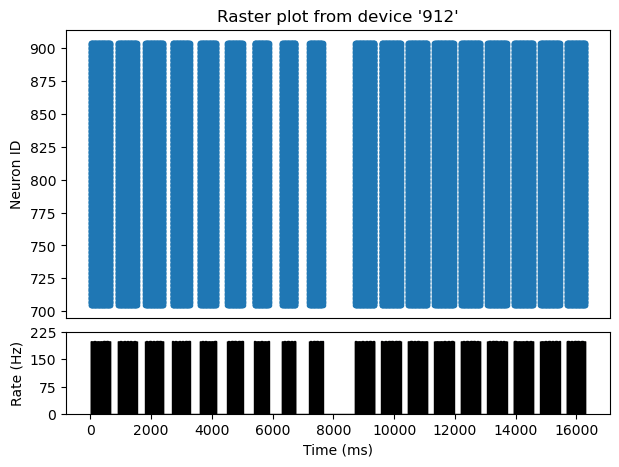

In [20]:
nest.raster_plot.from_device(net.spikes_re, hist=True)